# YSC2239 Final Examination Spring 2023

### This exam consists of 3 questions.

### Time: April 28th (Friday) 2:45pm - 5:15pm (No submission will be accepted after the deadline)

### Venue: Tan Chin Tuan Lecture Theatre at Yale-NUS College


## Table of Contents

### [1 Basic Data Science (40 points) ](#q1)

### [2 Basic Mathematics (22 points)](#q2)

### [3 Logistic Regression vs Decision Tree (38 points)](#q3)


In [417]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree

# you may get a warning from importing ensemble. It is OK to ignore said warning
from sklearn import ensemble
plt.style.use('fivethirtyeight')

## 1 Basic Data Science (40 points) <a id='q1'></a>

Our module is called the introduction to data science, so at the end of the module, it's worthy to have some brief review in restrospect. We spend quite some time on getting ourselves familiar with coding tool i.e. Python and some useful packages(for example datascience, pandas). As the saying goes, good tools are prerequisite to the success of a job. So then what is the "job" of the course? Definitely not the tool, as tools may differ from time to time. Instead, the key lies in the word `model`.



### Question 1.1 (2 points) Define the notation of model in data science.

In [418]:
# Simply write your answer to Question 1.1 below and no need to Run this cell

# In data science, a model is a function that maps a certain number of input parameters to an output of some sort.
# We call this output a prediction and the closer the models predictions come to real world data, the better we consider our model to be.
# In order to do that it analyses data and finds patterns in it. That is it finds a relationship between the input parameters and the output,
# through which it maps the independent variables to the dependent variable. 
# A model is called model because it only represents reality to some degree of accuracy but not perfectly.




Recall that there are four steps basic step when we talk about the modeling process:

A. Define a model.

B. Define a loss function.

C. Find the parameters that minimizes the loss.

D. Evaluate the model performance

We'll go through the `first three steps` on some example dataset from online repository loaded by using `load_dataset` command of `seaborn` package. The description of `load_dataset` is available at https://seaborn.pydata.org/generated/seaborn.load_dataset.html and the list of datasets is avaiable at https://github.com/mwaskom/seaborn-data. 

Note since we are not going to evaluate the model performance, we are not going to split the dataset into train set and test test. Instead, we use the full dataset to train various models for this part.

### Question 1.2 (3 points) Load the dataset named `tips` into our notebook and give the dataset the same name (i.e. tips) and show the last 15 rows of the dataset.

In [419]:
# Write your codes to Question 1.2 below and then Run this cell
tips = sns.load_dataset('tips')
tips.head(15)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Throughout the rest of questions (for part 1 Basic Data Science), we try to predict restaurant tips in **absolute amounts**.

`y_tips`: Each actual tip in our dataset is $y$, which is what we call the **observed value** or **dependent variable**. We want to predict each observed value as $\hat{y}$.

In [420]:
# No further action needed, just Run this cell to define y_tips array, the array of observed tips.
y_tips = np.array(tips['tip'])              

### Question 1.3 (in total 6 points) Use a **constant model $\hat{y} = \theta_0$ with $L_2$ loss** to predict the tip $\hat{y}$. In other words, regardless of any other details (i.e., features) about the meals, we will always predict our tip $\hat{y}$ as one single value: $\theta_0$. 

Remark on **$L_2$ loss** (also **squared loss**): for an observed tip value $y$ (i.e., the real tip), our prediction of the tip $\hat{y}$ would give an $L_2$ loss of:

$$\large L_2(y, \hat{y}) = \large (y - \hat{y})^2 = \large (y - \theta_0)^2 $$

We just defined loss for a single datapoint. Let's extend the above function to our entire dataset by taking the **average loss** across the dataset.

### Question 1.3a (3 points) Define the `mse_tips_constant` function which computes the **average $L_2$ error** on the tips dataset for the constant model with parameter $\theta_0$.

**Hint:** 
* You should use the array `y_tips` defined before.


In [421]:
#Complete the definition of the function and then Run the cell
def mse_tips_constant(theta0):
    """
    Calculate the average squared loss on the tips data for a constant model.
    
    Parameters
    ------------
    theta0 : fitted constant model
    
    Returns
    ------------
    The mean square error on the tips data for a constant model.
    """
    return np.mean((y_tips - theta0)**2)

mse_tips_constant(5.3) # Arbitrarily pick theta0 = 5.3

7.20452950819672

### Question 1.3b (3 points) Find the value of $\theta_0$ that minimizes the mean squared error for our `tips` dataset by using the `minimize` function. 

Note the function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it.

**Hints:** 
* You should use the function you defined earlier: `mse_tips_constant`.
* Assign `min_scipy_constant` to the result of the `minimize` function which is called with initial `x0 = 0.0`.

In [422]:
# Complete the ... part and then Run this cell.
min_scipy_constant = minimize(mse_tips_constant, x0=0.0)
theta0_hat_constant = min_scipy_constant['x'][0]
theta0_hat_constant

2.9982787346405537

In [423]:
print(np.mean(tips['tip']))

2.99827868852459


### Question 1.4 (in total 11 points) Instead of using the constant model, we assume that tip depends on the total amount of the bill of the meal and furthermore we assume **a linear model with $L_2$ loss** to predict the tip $\hat{y}$.

We define our model as the **linear model** that takes a single input feature, `total_bill`, $x$, and predicts the dependent variable, $\hat{y}$:

$$\large
\hat{y} = \theta_0 + \theta_1 x
$$

Our modeling goal is to find optimal parameter(s) $\hat{\theta_0}$ and $\hat{\theta_1}$ that **best fit our data**. We use **$L_2$ loss**, therefore for an observed tip value $y$ (i.e., the real tip), our prediction of the tip $\hat{y}$ would give an $L_2$ loss of:

$$\large L_2(y, \hat{y}) = \large (y - \hat{y})^2 = \large (y - (\theta_0 + \theta_1 x))^2 $$

In [424]:
# No further action needed, just Run this cell to define x_total_bills, the feature of our model.
x_total_bills = np.array(tips['total_bill'])

### Question 1.4a (3 points) Define the `mse_tips_linear` function which computes the mean squared error on the tips dataset for the linear model with parameters $\theta_0$ and $\theta_1$.

**Hints:** 
* This function takes in two parameters `theta0` and `theta1`.
* You should use the arrays `x_total_bills` and `y_tips` defined before.

In [425]:
#Complete the definition of the function and then Run the cell
def mse_tips_linear(theta0, theta1):
    """
    Calculate the mean squared error on the tips data for a linear model.
    
    Parameters
    ------------
    theta0 : intercept of the fitted linear model
    theta1 : slope of the fitted linear model
    
    Returns
    ------------
    The mean square error on the tips data for a linear model.
    """
    return np.mean((y_tips - (theta0 + theta1 * x_total_bills))**2)

print(mse_tips_linear(0.92, 0.15))
print(mse_tips_linear(0.9117181358798989, 0.10545671704437132)) #works
print(mse_tips_linear(0.9, 0.1)) # Arbitrarily pick theta0 = 0.9, theta1 = 0.1

1.9870855604508193
1.036034185513731
1.052336405737705


### Question 1.4b (8 points) As we learn in linear regression, the optimal parameter(s) $\hat{\theta_0}$ and $\hat{\theta_1}$ are just the intercept and slope of the regression line between `x_total_bills` and `y_tips`. Write down the expression for $\hat{\theta_0}$ and $\hat{\theta_1}$ explicitely, denoted by `theta0_hat_analytic` and `theta1_hat_analytic` respectively.

In [426]:
# Write out the slope and intercept of the regression line and then Run the Cell
theta1_hat_analytic = np.cov(x_total_bills, y_tips)[0, 1] / np.var(x_total_bills)
theta0_hat_analytic = np.mean(y_tips) - theta1_hat_analytic * np.mean(x_total_bills)
theta0_hat_analytic, theta1_hat_analytic

(0.9117181358798989, 0.10545671704437132)

### Question 1.5 (3 points) For predicting tip on the `tips` dataset, would you rather use the constant model or the linear model assuming an $L_2$ loss function for both and why?  

In [427]:
# Simply write your answer to Question 1.5 below and no need to Run this cell
# In many countries, at least in germany the tip is calculated as a percentage of the bill (in germany 10-20%).
# Because of that we need the L2 model that takes this into account so the L2 loss function may be more suitable for this purpose
# since the constant model will not capture the relationship between the tip and the bill.

### Question 1.6 (in total 9 points) Now we assume **a linear model with $L_1$ loss** (also known as the absolute loss) to predict the tip $\hat{y}$. For an observed tip value $y$, our prediction of the tip $\hat{y}$ would give an $L_1$ loss of:

$$\large L_1(y, \hat{y}) = |y - \hat{y}| = |y - (\theta_0 + \theta_1 x)|$$

### Question 1.6a (3 points) Define the `mae_tips_linear` function which computes the **Mean Absolute Error (MAE)** on the dataset for the linear model with parameters $\theta_0$ and $\theta_1$.

**Hint**: 
* You should use the arrays `x_total_bills` and `y_tips` defined before.

In [428]:
#Complete the definition of the function and then Run the cell
def mae_tips_linear(theta0, theta1):
    """
    Calculate the mean absolute error on the tips data for a linear model.
    
    Parameters
    ------------
    theta0 : intercept of the fitted linear model
    theta1 : slope of the fitted linear model
    
    Returns
    ------------
    The mean absolute error on the tips data for a linear model.
    """
    return np.mean(np.abs(y_tips - (theta0 + theta1 * x_total_bills)))

print(mae_tips_linear(0.5180755329767546, 0.12355450119525357))
mae_tips_linear(5.3, 2) # Arbitrarily pick theta0 = 5.3 and theta1 = 2

0.737377571727286


41.87360655737705

### Question 1.6b (3 points) In this case, unlike in Question 1.4, we do not have explicit analytical solution. So we are going to use the `minimize` function to find the value for $\hat{\theta_0}$ and $\hat{\theta_1}$. But there is a small technical issue. The `minimize` function can minimize functions of multiple variables. There's one quirk, however, which is that functions have to accept its parameters as a single list, so we will define $\vec{\theta} = \begin{bmatrix}\theta_0\\ \theta_1 \end{bmatrix}$, as a single list input to the function.


Implement the `mae_tips_linear_list` function, which is exactly like `mae_tips_linear` defined previously except that it takes in a single list of 2 variables rather than two separate variables.

In [429]:
#Complete the definition of the function and then Run the cell
def mae_tips_linear_list(theta):
    """
    Calculate the mean absolute error on the tips data for a linear model.
    
    Parameters
    ------------
    theta : a list containg [theta0, theta1]
    
    Returns
    ------------
    The mean absolute error on the tips data for a linear model.
    """
    return mae_tips_linear(theta[0], theta[1])

print(mae_tips_linear_list([0.5180755329767546, 0.12355450119525357]))
mae_tips_linear_list([5.3, 2]) # Arbitrarily pick theta = [5.3, 2]

0.737377571727286


41.87360655737705

### Question 1.6c (3 points) Compute the optimal value for $\hat{\theta_0}$ and $\hat{\theta_1}$ denoted by `theta0_hat_mae` and `theta1_hat_mae` respectively.

**Hint:**
* Assign `min_linear_mae` to the result of the `minimize` function which is called with initial `x0 = [0.0, 0.0]`.

In [430]:
# Complete the ... part and then Run this cell.
min_linear_mae = minimize(mae_tips_linear_list, x0=[0.0, 0.0])
theta0_hat_mae = min_linear_mae['x'][0]
theta1_hat_mae = min_linear_mae['x'][1]
theta0_hat_mae, theta1_hat_mae

(0.5180755329767546, 0.12355450119525357)

### Question 1.7 (6 points) Identify some key differences you observe between the **$L_1$ loss** and **$L_2$ loss**. Which one you prefer and why?

**Hint:**
* You can try ploting `mae_tips_linear` and `mse_tips_linear` to get some idea

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


<Axes: >

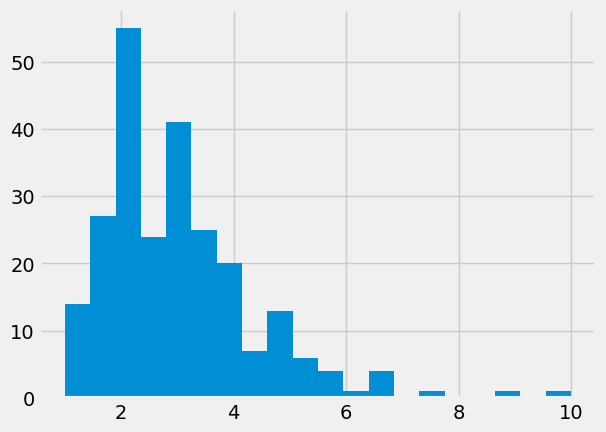

In [465]:
print(tips['tip'].describe())
tips['tip'].hist(bins=20)

In [432]:
# Simply write your answer to Question 1.7 below and no need to Run this cell
# When we choose which loss function to use we have to think about which will be most appropriate to the type of data that we have. 
# The mean squared error will ampllify any outliers more than the mean absolute error because the mse is a higher power. 
# So if we think about it in terms of taylor expansion, the ones with lowest power are most accurate close to x0 and the
# ones with highest power are most accurate far away from x0. By that token if we have a lot of outliers we should use the mae
# In this case the mean and median are very close, the standard deviation is over 30% of the mean though and the highest tip is 10 dollars
# while the lowest is 1 dollar. 50% of data is at least 30% off and it is skewed because the tips are cut off at 0 but the upper limit is
# technically open. So it seems like we do have some outliers. I think I would use the mae in this case.

## 2 Basic Mathematics (22 points) <a id='q2'></a>

Recall that for the Regression Line we learned in the first half of this semester, it is written as follows:

$$\hat{y} = \theta_0 + \theta_1 x,$$

where $\hat{y}$ denotes the predicted value of $y$ for the input value of $x$, $\theta_0$ is the intercept term and $\theta_1$ is the slope. 

In the second-half of this semester, we generalize the above simple linear regression (SLR) by including more varialbes or features so that the formulation of our multiple linear regression model is:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_p x_p$$

We can rewrite our multiple linear regression model using matrix notation. Let $\mathbb{Y}$ be the (column) vector of all $n$ observations in our sample. Then our prediction vector $\hat{\mathbb{Y}}$ is

$$\Large \hat{\mathbb{Y}} = \mathbb{X} \theta$$

meaning the prediction vector $\hat{\mathbb{Y}}$ is just the matrix multiplication between $\mathbb{X}$ and $\theta$, where $\mathbb{X}$ is the **design matrix** representing the $p$ features for all $n$ datapoints in our sample and $\theta$ is the parameter vector. You can refer to basic rules on the matrix multiplicaiton at wiki link (https://en.wikipedia.org/wiki/Matrix_multiplication) if need.

Note that for our SLR model, $p = 1$ and therefore the matrix notation seems rather silly. Nevertheless it is valuable to start small and build on our intuition.

Because we have an intercept term $\theta_0$ in our parameter vector $\theta$, our design matrix $\mathbb{X}$ for $p$ features actually has dimension

$$ \Large \mathbb{X} \in \mathbb{R}^{n \times (p + 1)}$$

Therefore, the resulting matrix expression $\hat{\mathbb{Y}} = \mathbb{X} \theta$ represents $n$ linear equations, where for $i$-th observation, 
$$\hat{y_i} = \theta_0 + \theta_1 x_1^i + \dots + \theta_p x_p^i = [1, x_1^i, \dots,x_p^i] \begin{bmatrix}\theta_0\\ \theta_1 \\ \dots \\ \theta_p \end{bmatrix}$$.

The constant all-ones column of $\mathbb{X}$ is sometimes called the **bias feature**; $\theta_0$ is frequently called the **bias or intercept term**.

### Question 2.1 (3 points) As the example dataset for this part (i.e  2 Basic Mathematics), load the dataset named `mpg` into our notebook, denote the dataset by the same name (i.e. `mpg`) and drop any rows that have missing data.

In [433]:
# Write your codes to Question 2.1 below and then Run this cell
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Question 2.2 (3 points) Implement `add_intercept` which computes a design matrix such that the first (left-most) column is all ones. 

Note that once we have contruct the all-ones column `bias_feature` by using the `np.ones` function (NumPy [documentation](https://numpy.org/doc/stable/reference/generated/numpy.ones.html?highlight=ones)) properly, we then call `np.concatenate` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)) function to generate `design matrix`. This part of code is already written.

**Hint:**
* `bias_feature` should be a (column) vector of dimension `(n,1)`, not a vector of dimension `(n,)`.

In [434]:
# Complete the ... part of the definition and then Run this cell.
def add_intercept(X):
    """
    Return X with a bias feature.
    
    Parameters
    -----------
    X: a 2D dataframe of p numeric features
    (may also be a 2D numpy array) of shape n x p
    
    Returns
    -----------
    A 2D matrix of shape n x (p + 1), where the leftmost
    column is a column vector of 1's
    """
    n = X.shape[0]
    bias_feature = np.ones((n, 1))
    return np.concatenate([bias_feature, X], axis=1)

X = add_intercept(mpg[['horsepower']])
X.shape

(392, 2)

### Question 2.3 (3 points) Define the model by implementing the `linear_model` function.

The predictions for all $n$ points in our data are (note $\theta = (\theta_0, \theta_1, \dots, \theta_p)$) :
$$ \Large \hat{\mathbb{Y}} = \mathbb{X} \theta. $$


**Hint**: 
* You can use [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [pd.DataFrame.dot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dot.html), or the `@` operator to multiply matrices/vectors. However, while the `@` operator can be used to multiply `numpy` arrays, it generally will not work between two `pandas` dataframe objects, so keep that in mind when computing matrix-vector products!


In [435]:
# Complete the definition of the function and then Run the cell
def linear_model(thetas, X):
    """
    Return the linear combination of thetas and features as defined above.
    
    Parameters
    -----------
    thetas: a 1D vector representing the parameters of our model ([theta1, theta2, ...])
    X: a 2D dataframe of numeric features (may also be a 2D numpy array)
    
    Returns
    -----------
    A 1D vector representing the linear combination of thetas and features as defined above.
    """
    return X @ thetas

### Question 2.4 (5 points) When we fit a linear model with mean squared error, it is equivalent to the following optimization problem:

$$\Large \min_{\theta} ||\Bbb{X}\theta - \Bbb{Y}||^2$$

And when $X^T X$ is invertible, there is an analytic solution which is given by the equation (if you are interested, there is a geometric argument with the detail in the [link provided](https://learningds.org/ch/15/linear_multi_fit.html) but not related to this quesiton):

$$ \Large \hat{\theta} = (\Bbb{X}^T\Bbb{X})^{-1}\Bbb{X}^T\Bbb{Y}$$

So please implement the analytic solution $\hat{\theta}$ using `np.linalg.inv` ([link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)) to compute the inverse of $\Bbb{X}^T\Bbb{X}$. Note: You can also consider using `np.linalg.solve` ([link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)) instead of `np.linalg.inv` because it is more robust (more on StackOverflow [here](https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li)). 


**Hint**: 
* To compute the transpose of a matrix, you can use `X.T` or `X.transpose()` ([link](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)).



In [436]:
#Complete the definition of the function and then Run the cell
def get_analytical_sol(X, y):
    """
    Computes the analytical solution to our
    least squares problem
    
    Parameters
    -----------
    X: a 2D dataframe (or numpy array) of numeric features
    y: a 1D vector of tip amounts
    
    Returns
    -----------
    The estimate for theta (a 1D vector) computed using the
    equation mentioned above.
    """
    return np.linalg.inv(X.T @ X) @ X.T @ y

Y = mpg['mpg']
analytical_thetas = get_analytical_sol(X, Y)
analytical_thetas

array([39.93586102, -0.15784473])

### Question 2.5 (in total 8 points) It's great we can have analytic solution for the optimization problems. But unfortunately it's not always the case in reality. For such cases, as we have seen in part 1, we are going to use `minimize` command.

### Question 2.5a (3 points) The cell below plots some arbitrary 4th degree polynomial function

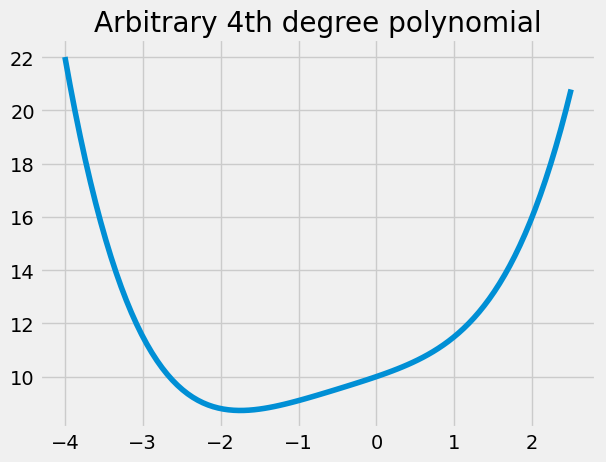

In [437]:
# No further action is needed, just Run the cell.
w_values = np.linspace(-4, 2.5, 100)

def fx(w):
    return 0.1 * w**4 + 0.2*w**3 + 0.2 * w **2 + 1 * w + 10

plt.plot(w_values, fx(w_values));
plt.title("Arbitrary 4th degree polynomial");

Compute the minimum value for the function `fx` and the optimal value of `x` which minimizes the function `fx` in the following cell, denoted by `min_of_fx` and `x_which_minimizes_fx` respectively.

**Hint:**
* Assign `min_result` to the result of `minimize` command.

**Initial guess**: The parameter `x0` that we passed to the `minimize` function is where it starts looking for the minimum. For the function above, it doesn't really matter what x we start at because the function is nice. Note that no matter what your actual variable is called in your function (`w` in this case), the `minimize` routine still expects a starting point parameter called `x0`.

In [438]:
#Complete the ... part and then Run the cell
min_result = minimize(fx, x0=-3.5)
min_of_fx = min_result['fun']
x_which_minimizes_fx = min_result['x'][0]
min_of_fx, x_which_minimizes_fx

(8.728505719866709, -1.746828116813396)

### Question 2.5b (5 points) The `minimize` function can minimize functions of multiple variables. But `minimize` isn't perfect. The reason is that if the function we are given has many valleys (also known as local minima), `minimize` can get stuck when trying to minimize the function. So it's useful to have `initial guess` around the true minimum. Provide one suggestion on how we can have a good initial guess.

In [439]:
# Simply write your answer to Question 2.5b below and no need to Run this cell
# We can plot the function graphically and then estimate around which areas the minimum could be. Other methods might include mathematical
# analysis I would for example try tailor expansion or see if I can just by looking at the function make a guess.
# Other methods could be to find the derivative or seeing if i could factor out terms etc.

## 3 Logistic Regression vs Decision Tree (38 points) <a id='q3'></a>

**Backgroud:** In our module, we have covered quite a few basic models and if you are interested, you can pursue further with more advanced data science related modules. A common concern may arise is about how to choose from those models. In fact, with the same data, we can follow different models. In this question, you are going to train a multi-class classifier with two different models (one-vs-rest logistic regression and decision trees) and compare the accuracies and decision boundaries created by each.

**Data and Task:** We'll be looking at a dataset of per-game stats for all NBA players in the 2021-22 season. This dataset comes from [basketball-reference.com](https://www.basketball-reference.com/). Our goal will be to predict a player's **position** given several other features.

In [440]:
# just run this cell
nba_data = pd.read_csv("nba21-22.csv")
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01


There are several features we could use to predict about position. For our purpose, we will restrict our exploration to two inputs: Rebounds (TRB) and Assists (AST). The main reason is that two-input features models will make our 2-D visualizations more straightforward.

The 5 most common positions in basketball are PG, SG, SF, PF, and C (which stand for point guard, shooting guard, small forward, power forward, and center; [Wikipedia](https://en.wikipedia.org/wiki/Basketball_positions)). This information is contained in the `Pos` column of the dataset. While we could set out to try and perform 5-class classification, the results (and visualizations) are slightly more interesting if we try and categorize players into 1 of 3 categories: **Guard**, **Forward**, and **Center** by using the `basic_position` function defined as follows:

In [441]:
# just run this cell
def basic_position(pos):
    if 'F' in pos:
        return 'F'
    elif 'G' in pos:
        return 'G'
    return 'C'

### Question 3.1 (2 points)  Take the `Pos` column of our dataframe and use it to create a new column `Pos3` that consist of values `'G'`, `'F'`, and `'C'` (which stand for Guard, Forward, and Center).

In [442]:
# Complete ... part below and then Run this cell
nba_data['Pos3'] = nba_data['Pos'].apply(basic_position)
nba_data['Pos3']

0      C
1      C
2      C
3      F
4      C
      ..
807    F
808    G
809    C
810    C
811    C
Name: Pos3, Length: 812, dtype: object

### Question 3.2 (3 points) Since there are many players in the NBA (in the 2021-22 season there were over 600 unique players), our visualizations may get noisy and messy. Let's restrict our data to only contain rows for players that averaged 10 or more points (as shown in the `PTS` column) per game. The new dataset is still named as `nba_data`.

In [443]:
# Complete ... part below and then Run this cell
nba_data = nba_data[nba_data['PTS'] >= 10]
nba_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,Pos3
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01,C
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01,C
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,G
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,alexani01,G
8,7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,allengr01,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,589,Robert Williams,C,24,BOS,61,61,29.6,4.4,6.0,...,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,williro04,C
795,593,Justise Winslow,PF,25,POR,11,10,26.8,4.3,10.5,...,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7,winslju01,F
797,595,Christian Wood,C,26,HOU,68,67,30.8,6.5,12.9,...,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,woodch01,C
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01,G


Let's have a look what the whole dataset look like with different values in features and their corrsponding positions.

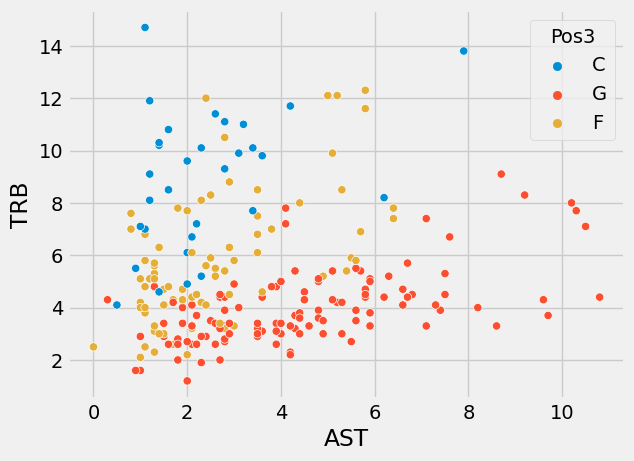

In [444]:
# just run this cell
sns.scatterplot(data = nba_data, x = 'AST', y = 'TRB', hue = 'Pos3');

### Question 3.3 (2 points) Before fitting any models, let's first split nba_data into a training set and test set. 

**Hint:**
* Using `train_test_split` command by setting `random_state=100` and `test_size = 0.25`.

In [445]:
# Complete ... part below and then Run this cell
nba_train, nba_test = train_test_split(nba_data, random_state=100, test_size=0.25)
nba_test.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,Pos3
608,459,Norman Powell,SF,28,POR,40,39,33.3,6.2,13.6,...,2.9,3.3,2.1,1.0,0.4,1.6,2.3,18.7,powelno01,F
784,584,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,...,2.3,3.1,3.9,1.0,0.4,2.4,2.2,12.9,willibr03,G
672,504,Anfernee Simons,SG,22,POR,57,30,29.5,6.2,14.0,...,2.2,2.6,3.9,0.5,0.1,2.0,1.9,17.3,simonan01,G
507,377,Khris Middleton,SF,30,MIL,66,66,32.4,6.8,15.5,...,4.8,5.4,5.4,1.2,0.3,2.9,2.4,20.1,middlkh01,F
158,125,Seth Curry,SG,31,BRK,19,19,29.9,5.5,11.1,...,2.4,2.6,2.6,0.9,0.2,1.3,2.5,14.9,curryse01,G


### One-vs-rest Logistic Regression

We only discussed binary logistic regression in class, but there is a natural extension of binary logistic regression called one-vs-rest logistic regression for multiclass classification. In essence, one-vs-rest logistic regression simply builds one binary logistic regression classifier for each of the `N` classes (in this scenario  𝑁=3). We then predict the class corresponding to the classifier that gives the highest probability among the `N` classes.

### Question 3.4 (5 points) In the cell below, set `logistic_regression_model` to be a one-vs-rest logistic regression model. Then, fit that model using the `AST` and `TRB` columns (in that order) from `nba_train` as our features, and `Pos3` as our response variable.

**Hint:**
* `sklearn.linear_model.LogisticRegression` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) has already been imported for you. There is an optional parameter **`multi_class`** you need to specify in order to make your model a multi-class one-vs-rest classifier. See the documentation for more details.


In [446]:
# Complete ... part below and then Run this cell
logistic_regression_model = LogisticRegression(multi_class='ovr')
logistic_regression_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

LogisticRegression(multi_class='ovr')

### Decision Tree

Let's now create a decision tree classifier on the same training data `nba_train`. In lecture we define the entropy of a node and use it to evaluate split quality for classification and regression trees. Another metric for determining the quality of a split is **Gini impurity**. This is defined as the chance that a randomly chosen element of a set would be incorrectly labeled if it was labeled randomly and independently according to the distribution of labels in the set. Gini impurity is a popular alternative to entropy for determining the best split at a node, and it is in fact the default criterion for scikit-learn's `DecisionTreeClassifier`.

### Question 3.5 (5 points) We can calculate the Gini impurity of a node with the formula ($p_C$ is the proportion of data points in a node with label/class $C$):

$$ G = 1 - \sum_{C} {p_C}^2 $$

Implement the `gini_impurity` function, which outputs the Gini impurity of a node with a given set of labels. The `labels` parameter is a list of labels in our dataset. For example, `labels` could be `['G', 'G', 'F', 'F', 'C', 'C']`

In [459]:
# Complete the definition of the function gini_impurity and then Run this cell
def gini_impurity(labels):
    p_c = pd.Series(labels).value_counts(normalize=True)
    return 1 - (p_c ** 2).sum()

gini_impurity(nba_data['Pos3'])

0.5930068370986921

### Question 3.6 (5 points) Use `tree.DecisionTreeClassifier` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) to fit a model using the same features and response as above, and call this model `decision_tree_model`. 

**Hint:**
* Set the `random_state` and `criterion` parameters to 42 and `gini`, respectively.

In [448]:
# Complete ... part below and then Run this cell
decision_tree_model = tree.DecisionTreeClassifier(random_state=42, criterion='gini')
decision_tree_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

DecisionTreeClassifier(random_state=42)

### Question 3.7 (5 points) Show performance by accuracy of both models in one plot. 

**Hints:**
* We can compute the accuracy by using `model.score()` function. Note `model.score()` is used the same way as `model.fit()` or `model.predict()` for classification or regression problems. The resulting scores are between 0 and 1, with a larger score indicating a better fit.
* The training accuracy and testing accuracy should be displayed seperately.

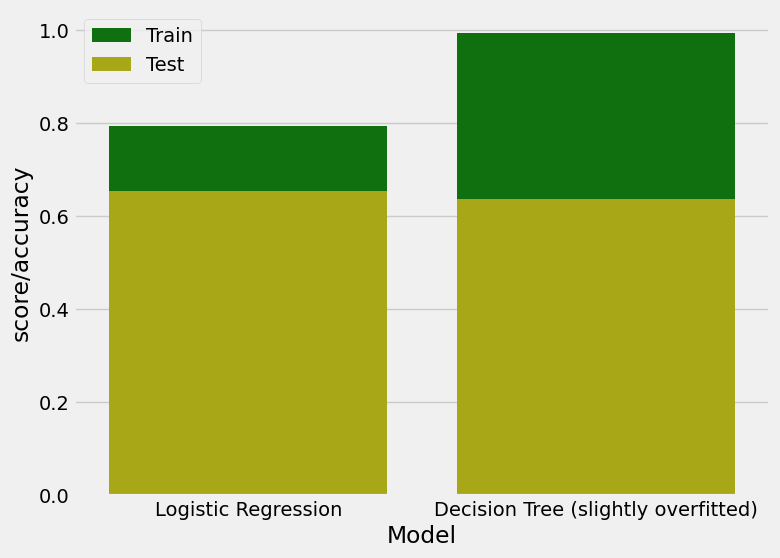

In [461]:
# Write your codes to Question 3.7 below and then Run this cell
train_acc_logistic_regression = logistic_regression_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
test_acc_logistic_regression = logistic_regression_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])

train_acc_decision_tree = decision_tree_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
test_acc_decision_tree = decision_tree_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])

accuracies = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree (slightly overfitted)'],
                           'Train Accuracy': [train_acc_logistic_regression, train_acc_decision_tree],
                           'Test Accuracy': [test_acc_logistic_regression, test_acc_decision_tree]})

plt.figure(figsize=(8, 6))
sns.barplot(data=accuracies, x='Model', y='Train Accuracy', color='g', label='Train')
sns.barplot(data=accuracies, x='Model', y='Test Accuracy', color='y', label='Test')
plt.ylabel('score/accuracy')
plt.legend()
plt.show()


To enable better comparision between two classifiers, we want to visualize the decision boundary for them classifier, and see how the classifiers perform on both the training and test data.

### Question 3.8 (5 points) Draw the decision boundaries for two classifers on training and testing sets in one plot using the `plot_decision_boundaries` function defined below.
**Hint:**
* 2 by 2 subplot is recommended.

In [450]:
# Just run this cell to define the function plot_decision_boundaries
def plot_decision_boundaries(model, nba_dataset, title=None, ax=None):
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
    xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse = True)
    Z_int = Z_int.reshape(xx.shape)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        
    ax.contourf(xx, yy, Z_int, cmap = sns_cmap)
    
    sns.scatterplot(data = nba_dataset, x = 'AST', y = 'TRB', hue = 'Pos3', ax=ax)

    if title is not None:
        ax.set_title(title)

/Users/jakobnunnendorf/.pyenv/versions/3.11.2/envs/ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jakobnunnendorf/.pyenv/versions/3.11.2/envs/ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jakobnunnendorf/.pyenv/versions/3.11.2/envs/ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/jakobnunnendorf/.pyenv/versions/3.11.2/envs/ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


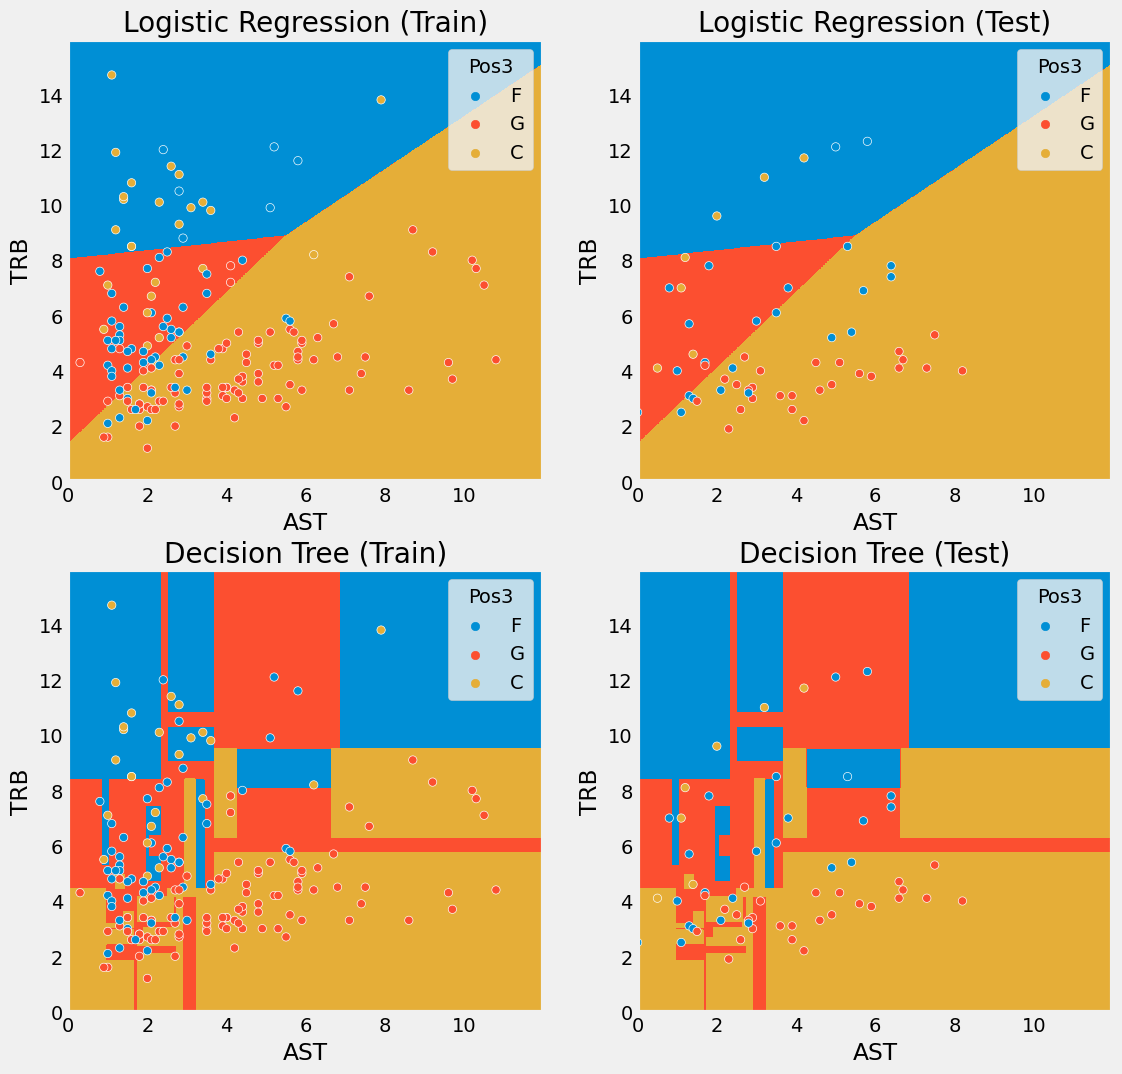

In [451]:
# Write your codes to Question 3.8 below and then Run this cell
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plot_decision_boundaries(logistic_regression_model, nba_train, 'Logistic Regression (Train)', ax=axes[0, 0])
plot_decision_boundaries(logistic_regression_model, nba_test, 'Logistic Regression (Test)', ax=axes[0, 1])
plot_decision_boundaries(decision_tree_model, nba_train, 'Decision Tree (Train)', ax=axes[1, 0])
plot_decision_boundaries(decision_tree_model, nba_test, 'Decision Tree (Test)', ax=axes[1, 1])

plt.show()

### Question 3.9 (6 points) Looking at the two models:
* Which model performes better on the training set?
* Which model performes better on the test set?
* How do the decision boundaries generated for each of the two models relate to the model's performance?

In [452]:
# Simply write your answer to Question 3.9 below and no need to Run this cell
# - The decision tree model is much stronger on the training set but slightly weaker on the test set as we can see from the accuracy bar plot.
# - The logistic regression model has lines and the decision tree model has squares in the plot for decision boundaries,
# which makes sense if we think about how the models work. 
# The beauty of datascience is that we can infer relationships that describe the real world from data without necessarily having any background knowledge,
# about the situation we are analysing. If we think about disciplines where we also figure out relationships to predict the real world
# but have to have a strong understanding of the situation like in physics, my main discipline, scientists over history often stuck to the most simple theory
# when explaining data in an experiment because the more complex the rules the more likeley that they only apply to that specific situation and cannot be generalised.
# In the same way the logistic regression model seems to have  a lot more simple rules than the decision tree model because it is just a line
# not a complex pattern of squares. This means that the logistic regression model is probably going to be better at generalising to new data
# while the decision tree model is going to be better at fitting these specific training data.
# Also we can see that in the training plots the dots are closer to their correct coloured areas in the decision tree model than in the logistic regression model
# because the logistic regression model has some very strong outliers. On the test data however, the results are a lot closer together.

## Final Words  (0 point)

If there was any question that you thought was ambiguous and required clarification to be answerable, please identify the question and state your assumptions. Be warned: We only plan to consider this information if we agree that the question was erroneous or ambiguous and we consider your assumption reasonable. (0 point)

In [453]:
# Simply write your comment below and no need to Run this cell
# This final exam was great at connecting the dots and using all the knowledge we acquired over the semester.
# I am overall very happy with the course, thanks prof!

### Submission

To submit your answer, please download your notebook as a .ipynb and .html file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as ... > Notebook (.ipynb) or HTML (.html). Then, upload **both files** under "Final_Eaxm" in the Assignments on Canvas.